In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
import numpy as np

X = np.load('X.npy')
y = np.load('y.npy')

print(y[:5])

X = X/255.0 # standardizing 


[0 0 0 0 1]


In [2]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu") )
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu") )
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.save('Rec Model Cats_Dogs')

#Can be done
'''
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
'''

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Rec Model Cats_Dogs\assets


"\nmodel.add(Dense(2))\nmodel.add(Activation('softmax'))\n\nmodel.compile(loss = 'sparse_categorical_crossentropy',\n             optimizer = 'adam',\n             metrics = ['accuracy'])\n"

In [97]:
model.fit(X,y, epochs=1, batch_size=32, validation_split=0.1)

702/702 [==============================] - 83s 119ms/step - loss: 0.4937 - accuracy: 0.7632 - val_loss: 0.4881 - val_accuracy: 0.7659


In [100]:
x_test = X[-7:]
print(y[-7:])

[0 0 1 1 0 1 1]


In [99]:
prediction = model.predict([x_test])
print(prediction)

[[0.13634881]
 [0.15348583]
 [0.8306045 ]
 [0.9429847 ]
 [0.01787323]
 [0.81741405]
 [0.88557196]]


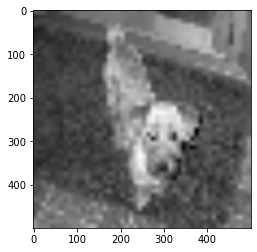

In [101]:
import matplotlib.pyplot as plt
import cv2
plt.imshow(cv2.resize(X[-7],(500,500)), cmap='gray')